## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

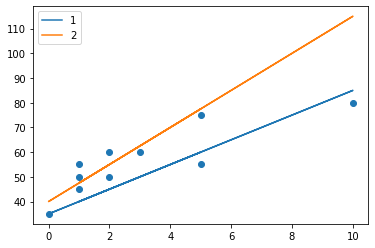

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [9]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК):

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [12]:
all(X @ y == np.dot(X,y))

True

In [13]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [14]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

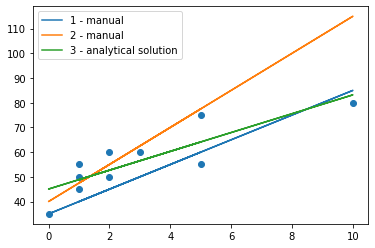

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [17]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [18]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [19]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875000000001)

Градиентный спуск

In [20]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [21]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [22]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

### Практическое задание

1. Подберите скорость обучения (alpha) и количество итераций.

In [37]:
alpha = 5e-2
W = np.array([1, 0.5])
def proced(alpha, X, y, W, verb = 1):
    n = X.shape[1]
    err_arr = []
    if verb:
        print(f'Number of objects = {n} \
               \nLearning rate = {alpha} \
               \nInitial weights = {W} \n')

    for i in range(500):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        err_arr.append(err)
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
        if i % 10 == 0:
            #alpha /= 1.1
            if verb:
                print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
    return err_arr, W
err_arr, W = proced(alpha, X, y, W, verb = 1)

Number of objects = 10                
Learning rate = 0.05                
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
Iteration #10: W_new = [19.96966932  8.87179137], MSE = 379.6
Iteration #20: W_new = [29.27719328  6.70531799], MSE = 172.93
Iteration #30: W_new = [35.16120834  5.60976141], MSE = 94.66
Iteration #40: W_new = [38.85365942  4.93848587], MSE = 63.9
Iteration #50: W_new = [41.16920131  4.51849616], MSE = 51.81
Iteration #60: W_new = [42.62118483  4.25519525], MSE = 47.05
Iteration #70: W_new = [43.53165976  4.0900943 ], MSE = 45.18
Iteration #80: W_new = [44.10257814  3.98656703], MSE = 44.45
Iteration #90: W_new = [44.46057568  3.9216497 ], MSE = 44.16
Iteration #100: W_new = [44.68506002  3.88094292], MSE = 44.04
Iteration #110: W_new = [44.82582417  3.85541751], MSE = 44.0
Iteration #120: W_new = [44.91409111  3.83941166], MSE = 43.98
Iteration #130: W_new = [44.96943938  3.82937511], MSE = 43.97
Iteration #140: W_new = [45.004145

C:\Users\VASILI~1\AppData\Local\Temp/ipykernel_8668/3742850353.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,1)
C:\Users\VASILI~1\AppData\Local\Temp/ipykernel_8668/3742850353.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,2)
C:\Users\VASILI~1\AppData\Local\Temp/ipykernel_8668/3742850353.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curren

C:\Users\VASILI~1\AppData\Local\Temp/ipykernel_8668/3742850353.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,1)
C:\Users\VASILI~1\AppData\Local\Temp/ipykernel_8668/3742850353.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,2)
C:\Users\VASILI~1\AppData\Local\Temp/ipykernel_8668/3742850353.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curren

C:\Users\VASILI~1\AppData\Local\Temp/ipykernel_8668/3742850353.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,1)
C:\Users\VASILI~1\AppData\Local\Temp/ipykernel_8668/3742850353.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,2)
C:\Users\VASILI~1\AppData\Local\Temp/ipykernel_8668/3742850353.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curren

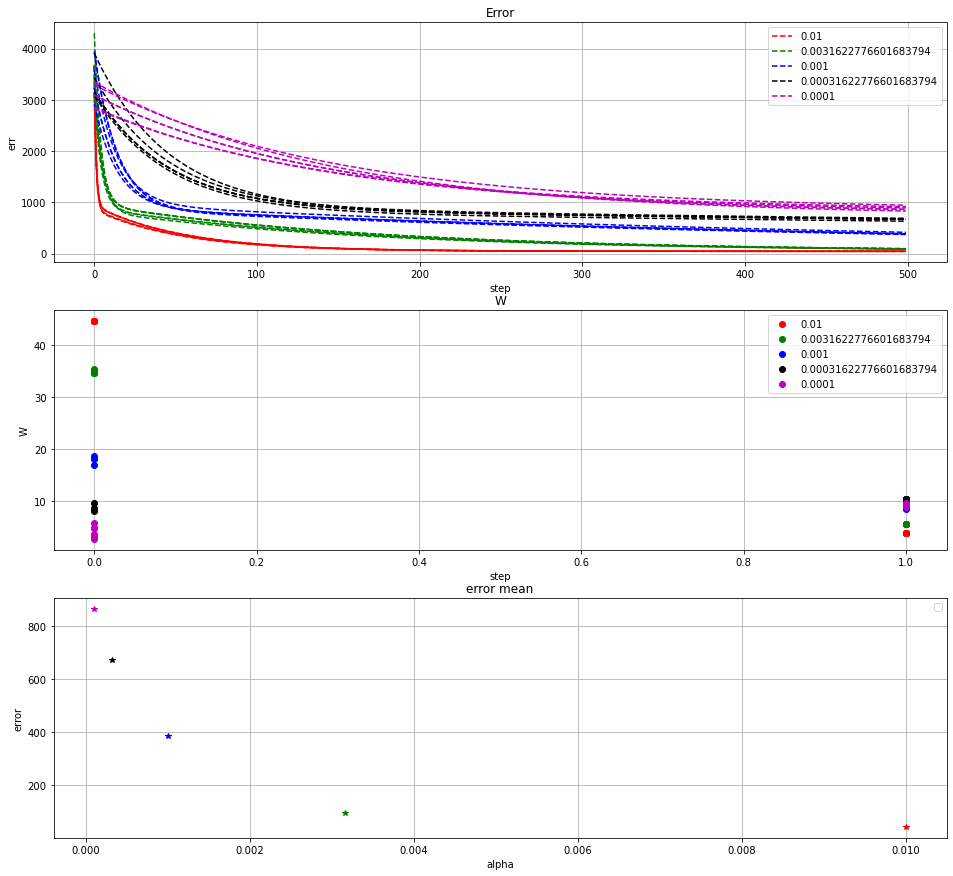

In [38]:
plt.figure(figsize = (16, 15))
s = ['r', 'g', 'b', 'k', 'm']
for m, alpha in zip(s, np.logspace(-2, -4, 5).tolist()):
    for i in range(5):
        W = np.random.randn(2)
        err_arr, W = proced(alpha, X, y, W, verb = 0)
        plt.subplot(3,1,1)
        plt.plot(err_arr, '--'+m)
        plt.subplot(3,1,2)
        plt.plot(W, 'o'+m)
    plt.subplot(3,1,1)
    plt.plot(err_arr,'--'+m, label = str(alpha))
    plt.subplot(3,1,2)
    plt.plot(W, 'o'+m, label = str(alpha))
    plt.subplot(3,1,3)
    plt.plot(alpha,np.mean(err_arr[-5:]), '*'+m)
plt.subplot(3,1,1)
plt.legend()
plt.grid(True)
plt.title('Error')
plt.ylabel('err')
plt.xlabel('step')
plt.subplot(3,1,2)
plt.legend()
plt.grid(True)
plt.title('W')
plt.ylabel('W')
plt.xlabel('step')
plt.subplot(3,1,3)
plt.legend()
plt.grid(True)
plt.title('error mean')
plt.ylabel('error')
plt.xlabel('alpha')
plt.show()

*2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.


In [39]:
n = X.shape[1]
alpha = 5e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(300):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X* (y_pred - y), axis = 1))
    #W_pred = W
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.05        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
Iteration #10: W_new = [18.77319138  8.6270072 ], MSE = 398.58
Iteration #20: W_new = [27.15289315  7.06014716], MSE = 207.1
Iteration #30: W_new = [32.4241672   6.10426679], MSE = 124.63
Iteration #40: W_new = [35.85213314  5.48265802], MSE = 86.53
Iteration #50: W_new = [38.15155609  5.06569312], MSE = 67.79
Iteration #60: W_new = [39.73790007  4.7780341 ], MSE = 58.04
Iteration #70: W_new = [40.86051023  4.57446606], MSE = 52.69
Iteration #80: W_new = [41.67349173  4.4270444 ], MSE = 49.62
Iteration #90: W_new = [42.2746909  4.3180262], MSE = 47.78
Iteration #100: W_new = [42.727794    4.23586294], MSE = 46.63
Iteration #110: W_new = [43.07521157  4.17286412], MSE = 45.89
Iteration #120: W_new = [43.34578807  4.12379924], MSE = 45.4
Iteration #130: W_new = [43.55952748  4.08504089], MSE = 45.06
Iteration #140: W_new = [43.73055537  4.05402762],

*3. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [40]:
n = X.shape[1]
alpha = 7e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
        \nLearning rate = {alpha} \
        \nInitial weights = {W} \n')

err_old = 100
err = 0

min_err = 1e-4
iter_num = 0
max_iter = 200

while(np.linalg.norm(err - err_old) > min_err) and (iter_num < max_iter):
    y_pred = np.dot(W, X)
    err_pld = err
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.sum(X* (y_pred - y), axis = 1))
    iter_num += 1
    
    if iter_num % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')        

Number of objects = 10         
Learning rate = 0.07         
Initial weights = [1.  0.5] 

Iteration #299: W_new = [ -61.74739976 -461.29170849], MSE = 1880470.95
Iteration #299: W_new = [ -656.95633884 -3799.43696088], MSE = 172642603.33
Iteration #299: W_new = [ -888.23348518 -5103.37028257], MSE = 445840704.87
Iteration #299: W_new = [-131.83078336 -947.45085347], MSE = 22983367.41
Iteration #299: W_new = [ 38.81500366 -15.11679112], MSE = 14937.95
Iteration #299: W_new = [43.23817011  4.11135069], MSE = 45.72
Iteration #299: W_new = [43.80248706  4.04098155], MSE = 44.77
Iteration #299: W_new = [44.15943609  3.97625672], MSE = 44.38
Iteration #299: W_new = [44.39505787  3.93353034], MSE = 44.19
Iteration #299: W_new = [44.55526297  3.90447962], MSE = 44.1
Iteration #299: W_new = [44.66715058  3.88419052], MSE = 44.05
Iteration #299: W_new = [44.74721554  3.86967197], MSE = 44.02
Iteration #299: W_new = [44.80578521  3.85905127], MSE = 44.0
Iteration #299: W_new = [44.84949528  3.8